In [ ]:
!pip install -q -U kaggle_environments

In [ ]:
import numpy as np
import pandas as pd
import random
import math

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

**1. Опишем поведение агента, всегда играющего "камень" - это значение 0**

In [ ]:
def my_rock_agent(observation, configuration):
    return 0

**2. Опишем поведение агента, всегда играющего "бумагу" - это значение 1**

In [ ]:
def my_paper_agent(observation, configuration):
    return 1

**3. Опишем поведение агента, всегда играющего "ножницы" - это значение 2**

In [ ]:
def my_scissors_agent(observation, configuration):
    return 2

**4. Опишем поведение агента, который всегда случайно играет**

In [ ]:
def random_agent(observation, configuration):
    return random.randint(0,2)

**5. Опишем поведение агента, который в четную игру ставит "ножницы" (значение 2), а в нечетную "камень" (значение 0)**

In [ ]:
def chet_sc_agent(observation, configuration):
    # Так как шаги начинаются с 0, а попытка 1 (нечетная) добавляем к шагу +1
    if (observation.step + 1) % 2 == 0:
        return 2
    else:
        return 0

**6. Опишем агента, который в четную игру ставит "камень" (значение 0), а в нечетную "бумагу" (значение 1)**

In [ ]:
def chet_ro_agent(observation, configuration):
    # Так как шаги начинаются с 0, а попытка 1 (нечетная) добавляем к шагу +1
    if (observation.step + 1) % 2 == 0:
        return 0
    else:
        return 1

**7. Опишем агента, который в четную игру ставит "бумагу" (значение 1), а в нечетную "камень" (значение 0)**

In [ ]:
def chet_pa_agent(observation, configuration):
    # Так как шаги начинаются с 0, а попытка 1 (нечетная) добавляем к шагу +1
    if (observation.step + 1) % 2 == 0:
        return 1
    else:
        return 0

**8. Опишем агента, который производит то же самое действие, что и оппонент на прошлом ходу**

In [ ]:
def copy_agent(observation, configuration):
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        return random.randint(0,2)

**9. Опишем агента, который ставит следующее значение от предыдущего оппонента (последовательность 0-1-2)**

In [ ]:
def last_plus_agent(observation, configuration):
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % 3
    else:
        return random.randint(0,2)

**10. Опишем агента, который ставит предыдущее значение от предыдущего оппонента (последовательность 0-1-2)**

In [ ]:
def last_minus_agent(observation, configuration):
    if observation.step > 0:
        # Словарь для выбора предыдущих значений
        mapping = {0: 2, 1: 0, 2: 1}
        return mapping[observation.lastOpponentAction]
    else:
        return random.randint(0,2)

**11. Опишем агента, который ставит согласно последовательности (2-2-1)**

In [ ]:
def two_two_one_agent(observation, configuration):
    if (observation.step + 1) % 3 or observation.step == 0:
        return 2
    else:
        return 1

**12. Опишем агента, который ставит согласно последовательности (1-1-2)**

In [ ]:
def one_one_two_agent(observation, configuration):
    if (observation.step + 1) % 3 or observation.step == 0:
        return 1
    else:
        return 2

**13. Опишем агента, который ставит согласно последовательности (0-0-2)**

In [ ]:
def zero_zero_two_agent(observation, configuration):
    if (observation.step + 1) % 3 or observation.step == 0:
        return 0
    else:
        return 2

**Собираем словарь агентов, где ключ - наименование, а значение сама функция агента**

In [ ]:
agents = {
    "my_rock_agent": my_rock_agent,
    "my_paper_agent": my_paper_agent,
    "my_scissors_agent": my_scissors_agent,
    "random_agent": random_agent,
    "chet_sc_agent": chet_sc_agent,
    "chet_ro_agent": chet_ro_agent,
    "chet_pa_agent": chet_pa_agent,
    "copy_agent": copy_agent,
    "last_plus_agent": last_plus_agent,
    "last_minus_agent": last_minus_agent,
    "two_two_one_agent": two_two_one_agent,
    "one_one_two_agent": one_one_two_agent,
    "zero_zero_two_agent": zero_zero_two_agent
}

**Собираем словарь агентов, где ключ - наименование, а значение количество очков**

In [ ]:
result_win = {
    "my_rock_agent": 0,
    "my_paper_agent": 0,
    "my_scissors_agent": 0,
    "random_agent": 0,
    "chet_sc_agent": 0,
    "chet_ro_agent": 0,
    "chet_pa_agent": 0,
    "copy_agent": 0,
    "last_plus_agent": 0,
    "last_minus_agent": 0,
    "two_two_one_agent": 0,
    "one_one_two_agent": 0,
    "zero_zero_two_agent": 0
}

**Проводим турнир среди всех агентов. Играет каждый с каждым по 200 раз (можно увеличить при необходимости)**

In [ ]:
# Создаем вспомогательный список
agents_help = list(agents.keys())

# Цикл по элементам словаря (все агенты)
for i in agents:

  # Цикл по элементам вспомогательного списка
  for j in agents_help:

    # Используем функцию для получение результата 200 игр
    temp = (evaluate("rps", [agents[i], agents[j] ], configuration={"episodeSteps": 200}))

    # Записываем очки каждому из ангетов
    result_win[i] += temp[0][0]
    result_win[j] += temp[0][1]

  # Удаляем прошедшего агента из вспомогательного списка
  agents_help.remove(i)

# Сортируем получившийся словарь по количеству очков агентов
agents_win = {key: value for key, value in sorted(result_win.items(), key=lambda item: item[1], reverse=True)}

# Выводим агента и его очки в порядке убывания
for agent, win in agents_win.items():
  print(f'{agent} количество побед - {win}')


copy_agent количество побед - 597.0
chet_ro_agent количество побед - 335.0
one_one_two_agent количество побед - 309.0
my_paper_agent количество побед - 134.0
random_agent количество побед - 45.0
last_plus_agent количество побед - -3.0
chet_sc_agent количество побед - -68.0
my_rock_agent количество побед - -69.0
my_scissors_agent количество побед - -69.0
zero_zero_two_agent количество побед - -88.0
chet_pa_agent количество побед - -266.0
two_two_one_agent количество побед - -266.0
last_minus_agent количество побед - -591.0


**Отобразим результаты на графике**

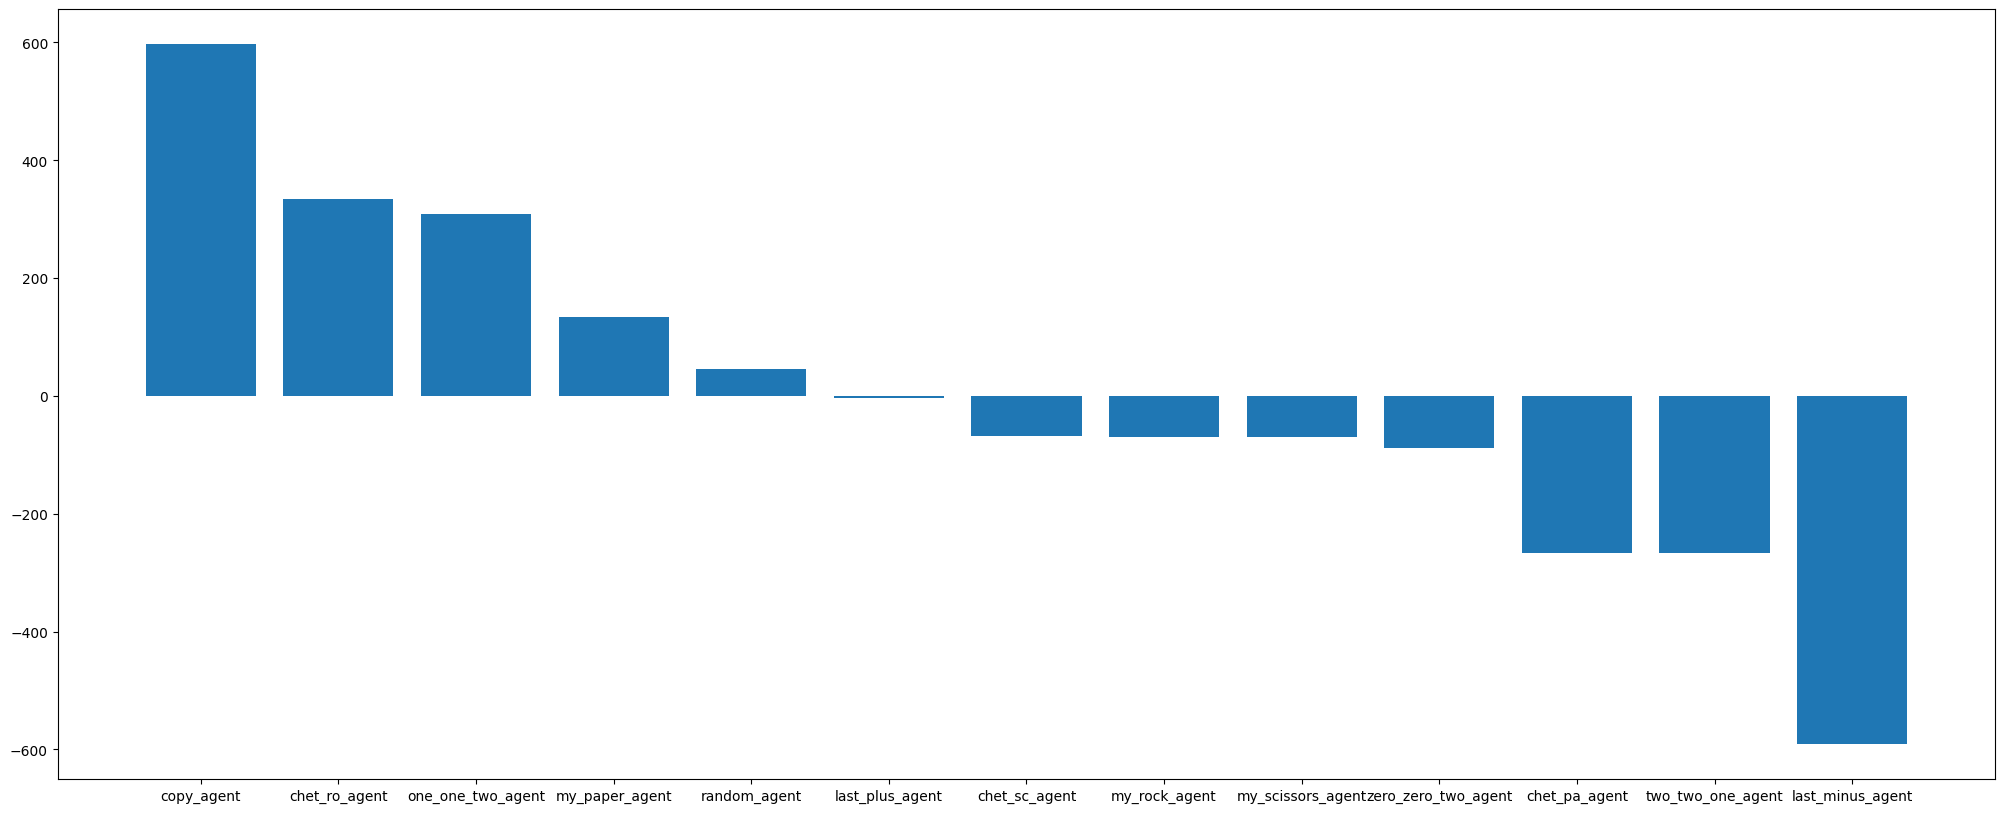

In [ ]:
# Значения на оси x и y
names = agents_win.keys()
values = agents_win.values()

# Размер графика и его отображение
plt.figure(figsize=(25, 10))
plt.bar(names, values)
plt.show()